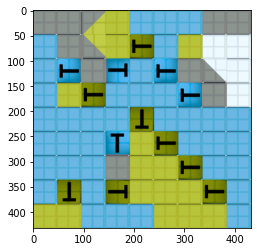

In [6]:
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
import matplotlib.pyplot as plt
import fastwfc
wfc = fastwfc.XLandWFC("samples.xml")
seed,img = wfc.generate(out_img=True)
plt.imshow(img)
plt.pause(0.01)
# wave = wfc.wave_from_id(seed)



In [7]:
unity3d_env = WFCUnity3DEnv()
unity3d_env.set_wave(wave=seed)
unity3d_env.render_in_unity()

Trying to connect to 0.0.0.0:30051
reset world and agent


In [28]:
unity3d_env.mutate_a_new_map()
unity3d_env.render_in_unity()

reset world and agent


# 连续生成

In [ ]:
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
import matplotlib.pyplot as plt
import fastwfc
wfc = fastwfc.XLandWFC("samples.xml")
unity3d_env = WFCUnity3DEnv()

Trying to connect to 0.0.0.0:30051


In [ ]:
wfc.get_ids_from_wave

In [ ]:
import time
import cv2

while True:
    wfc = fastwfc.XLandWFC("samples.xml")
    seed,img = wfc.generate(out_img=True)
    # plt.imshow(img)
    # plt.pause(0.01)
    wave = wfc.wave_from_id(seed)
    unity3d_env.set_wave(wave=wave)
    del wave
    unity3d_env.render_in_unity()
    # cv2 RGB2BGR
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imshow("img", img)
    cv2.waitKey(1)
    time.sleep(0.5)
    


reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset worl

KeyboardInterrupt: 

# 连续变化

In [ ]:
import fastwfc

In [ ]:
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
import matplotlib.pyplot as plt
import fastwfc
wfc = fastwfc.XLandWFC("samples.xml")
unity3d_env = WFCUnity3DEnv()


Trying to connect to 0.0.0.0:30051


In [ ]:
import time
import cv2
while True:
    wave = wfc.build_a_open_area_wave()
    seed,img = wfc.mutate(base_wave=wave, out_img=True, iter_count=1, new_weight=81)
    # plt.imshow(img)
    # plt.pause(0.01)
    wave = wfc.wave_from_id(seed)
    unity3d_env.set_wave(wave=wave)
    del wave
    unity3d_env.render_in_unity()
    # cv2 RGB2BGR
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imshow("img", img)
    cv2.waitKey(1)
    time.sleep(0.5)
    


reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset worl

In [1]:
import fastwfc
wfc=fastwfc.XLandWFC("samples.xml")



# 散度平滑变动

In [47]:
from utils import calc_entropy, cs_divergence, json_to_tileid, tileid_to_json
import numpy as np
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data
import os
import datetime
min_length = 81
# def length_list_to_dist(length_list: np.ndarray) -> np.ndarray:
    # return np.bincount(length_list.reshape(-1), minlength=min_length) / np.bincount(length_list.reshape(-1), minlength=min_length).sum()
import networkx as nx
import matplotlib.pyplot as plt
import time
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
import fastwfc
wfc = fastwfc.XLandWFC("samples.xml")
new = True
if new:
    wave = wfc.build_a_open_area_wave()
    ids = wfc.get_ids_from_wave(wave)
    save_path = "maps_start_from_empty_"+ str(datetime.datetime.now()).replace(" ", "_").replace(":", "_").replace(".", "_")
    os.makedirs(save_path, exist_ok=True)
    json_data = tileid_to_json(ids, save_path=os.path.join(save_path, "0.json"))
    map_id = 1
    base_wave = wave
else:
    last_map = "maps_start_from_empty_2022-11-26_17_24_59_155572/49.json"
    save_path = "maps_start_from_empty_2022-11-26_17_24_59_155572"
    print(json_to_tileid(last_map))
    wave = wfc.wave_from_id(json_to_tileid(last_map))
    map_id = 50
    base_wave = wave


In [48]:
# 连接Unity，初始空地
unity3d_env = WFCUnity3DEnv()
unity3d_env.set_wave(wave=wave)
unity3d_env.render_in_unity()


Trying to connect to 0.0.0.0:30051
reset world and agent


In [49]:
max_iters = 100
while max_iters>0:
    DG = map2digraph(tiles2data(wfc.get_ids_from_wave(base_wave)))
    dist1 = get_map_shortest_length_dist(DG, norm=False)
    new_ids, _ = wfc.mutate(base_wave=base_wave,new_weight=162,iter_count=1,out_img=False)
    new_wave = wfc.wave_from_id(new_ids)
    DG2 = map2digraph(tiles2data(new_ids))
    dist2 = get_map_shortest_length_dist(DG2, norm=False)
    max_iters-=1
    count = 0
    while np.abs(cs_divergence(dist1, dist2)) > 0.09 or np.abs(cs_divergence(dist1, dist2)) == 0.0:
        count +=1
        new_ids, _ = wfc.mutate(base_wave=base_wave,new_weight=162,iter_count=1,out_img=False)
        new_wave = wfc.wave_from_id(new_ids)
        DG2 = map2digraph(tiles2data(new_ids))
        dist2 = get_map_shortest_length_dist(DG2, norm=False)
    print(cs_divergence(dist1, dist2))
    dist1 = dist2
    base_wave=new_wave
    ids = wfc.get_ids_from_wave(base_wave)
    json_data = tileid_to_json(ids, save_path=os.path.join(save_path, f"{map_id}.json"))
    map_id+=1
    unity3d_env.set_wave(wave=new_wave)
    unity3d_env.render_in_unity()
    # time.sleep(0.5)

1.6915404019792522e-05
reset world and agent
0.0011252606267059986
reset world and agent
0.0005175986506174412
reset world and agent
0.00136846482413341
reset world and agent
0.012874363248874013
reset world and agent
0.017495545373321292
reset world and agent
0.0200112056866336
reset world and agent
0.0484025484088982
reset world and agent
0.028160567606568727
reset world and agent
0.01796235148462492
reset world and agent
0.002801622705041543
reset world and agent
0.040650406277187925
reset world and agent
0.018633956281791587
reset world and agent
0.029758238733139666
reset world and agent
0.02855160211324274
reset world and agent
0.031377348817478654
reset world and agent
0.015207910864391059
reset world and agent
0.029111654810053025
reset world and agent
0.04803209700558335
reset world and agent
0.02200167478525794
reset world and agent
0.0004439055084655127
reset world and agent
0.017747957305714927
reset world and agent
0.016041780296560542
reset world and agent
0.0601935365233

KeyboardInterrupt: 

In [4]:
map0 = json_to_tileid(os.path.join(save_path, "0.json"))
map51 = json_to_tileid(os.path.join(save_path, "51.json"))
dg_map_0 = map2digraph(tiles2data(map0))
dg_map_51 = map2digraph(tiles2data(map51))
dist_map0 = get_map_shortest_length_dist(dg_map_0, norm=False)
dist_map1 = get_map_shortest_length_dist(dg_map_51, norm=False)
cs_dist = cs_divergence(dist_map0, dist_map1)
print(cs_dist)

0.2097720965653997


# 定高生成路径分布有差异的地图
## 高度分布不变，路径分布散度>0.8

In [ ]:
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
import fastwfc
import networkx as nx
import matplotlib.pyplot as plt
import time
import os
from utils import get_map_shortest_length_dist, calc_entropy,length_list_to_dist,cs_divergence
from graph_analysis import DiGraphStats
from map2graph import map2digraph, tile2heightdist
import numpy as np


In [ ]:
tile2heightdist(seed)

array([ 0, 42, 22,  5,  0,  0, 12])

NameError: name 'WFCUnity3DEnv' is not defined